In [2]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from openpyxl import Workbook
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [72]:
# openpyxl을 이용해 엑셀 파일로 저장하기 위한 준비 과정
excell = Workbook(write_only=True)
ws = excell.create_sheet()
ws.append(['score', 'title', 'writer', 'date', 'review', 'senti_score'])

In [8]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'
print(url)
webpage = urlopen(url)

https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3


In [9]:
source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8')

In [10]:
review_list = source.findAll('div', {'class': 'imdb-user-review'})

In [ ]:
# SentimentIntensityAnalyzer()를 실행하기 위해서 설치
# import nltk
# nltk.download('vader_lexicon')

In [16]:
import nltk 

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [19]:
sid = SentimentIntensityAnalyzer()   # VADER 감정분석기 미리 준비

In [20]:
sum_review = ''   # wordcloud 띄워줄때 쓸 모든 리뷰 텍스트 다 합친 문자열

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [73]:
for review in review_list:
    list1 = []
    score = review.find('span').get_text()
    title = review.find('a').get_text().replace('\n', '')
    writer = review.find('span', {'class': 'display-name-link'}).get_text()
    date = review.find('span', {'class': 'review-date'}).get_text()
    content = review.find('div', {'class': 'text show-more__control'}).get_text()

    # 엑셀 파일에 저장하기 위해 list에 각 정보를 추가
    list1.append(score)
    list1.append(title)
    list1.append(writer)
    list1.append(date)
    list1.append(content)
    sum_review = sum_review + content
    
    # 리뷰 텍스트를 문장별로 쪼개는 전처리 함수
    lines_list = tokenize.sent_tokenize(content)
    
    # 한 리뷰의 각 문장마다 감정 점수 계산 
    sum = 0
    for sent in lines_list:  
        ss = sid.polarity_scores(sent)
        sum = sum+ss['compound']
        
    # 문장들의 평균점수가 그 리뷰의 감정 점수
    sum1 = str(sum/len(lines_list)) 
    
    list1.append(sum1)
    
    # 지금까지 뽑아냈던 내용들을 openpyxl worksheet에 저장
    ws.append(list1) 

# imdb_.xlsx라는 파일명으로 엑셀파일 저장
excell.save('imdb_.xlsx') 

In [50]:
list1

['\n\n\n\n\n\n9/10\n',
 ' Again a fight, but bigger',
 'BiiivAL',
 '3 June 2018',
 "I went and looked, and I want to express my thoughts.I went to this film with very high expectations, with a sense of something. I went to him twice, the first time, myself, and the second with the family, and I was even surprised that my mother, sister and dad (who do not understand this movie at all) brought unreal pleasure and an ocean of emotions.Each frame, each scene does not let you get bored, from the Marvel logo, and to the stage after the credits. Favorite heroes once again experienced side by side and you feel it, you are completely absorbed in a hurricane of events and you are watching it in one breath. In comparison with the War of Infinity, even the Confrontation looks like an ordinary fight in the sandbox.Uuuu, and the villain, the best as for me the best in this kirovoveselennoy, he is not just a bot at once, without motivation, no, it's just the opposite. I liked Thanos so much that you

In [51]:
lines_list

['I went and looked, and I want to express my thoughts.I went to this film with very high expectations, with a sense of something.',
 'I went to him twice, the first time, myself, and the second with the family, and I was even surprised that my mother, sister and dad (who do not understand this movie at all) brought unreal pleasure and an ocean of emotions.Each frame, each scene does not let you get bored, from the Marvel logo, and to the stage after the credits.',
 'Favorite heroes once again experienced side by side and you feel it, you are completely absorbed in a hurricane of events and you are watching it in one breath.',
 "In comparison with the War of Infinity, even the Confrontation looks like an ordinary fight in the sandbox.Uuuu, and the villain, the best as for me the best in this kirovoveselennoy, he is not just a bot at once, without motivation, no, it's just the opposite.",
 'I liked Thanos so much that you do not want to, and he began to impress me, in terms of his convi

In [52]:
sum_review

'This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.This film is way better than endgame!\nThe actions better\nThe writings better\nThe dialogues better\nThe cgi is better\nMore shocks and more emotional.\nWatching both in the cinema , the reactions to this in cinema was unbelievable compared to endgame. Dont get me wrong endgame is good but to say its the best marvel film is jus marvel fan boys being stupid.\nI just dont see how people are saying endgame is the best marvel film when theres clearly oth

In [53]:
lines_list

['I went and looked, and I want to express my thoughts.I went to this film with very high expectations, with a sense of something.',
 'I went to him twice, the first time, myself, and the second with the family, and I was even surprised that my mother, sister and dad (who do not understand this movie at all) brought unreal pleasure and an ocean of emotions.Each frame, each scene does not let you get bored, from the Marvel logo, and to the stage after the credits.',
 'Favorite heroes once again experienced side by side and you feel it, you are completely absorbed in a hurricane of events and you are watching it in one breath.',
 "In comparison with the War of Infinity, even the Confrontation looks like an ordinary fight in the sandbox.Uuuu, and the villain, the best as for me the best in this kirovoveselennoy, he is not just a bot at once, without motivation, no, it's just the opposite.",
 'I liked Thanos so much that you do not want to, and he began to impress me, in terms of his convi

In [39]:
def generate_wordcloud(text): 
    
    # 워드클라우드 만드는 부분
    wordcloud = WordCloud ( font_path='framd.ttf', width=2400, height=1800,
    ranks_only=None,
    relative_scaling = 0.8,
    stopwords = set(STOPWORDS) ).generate(text)
    
    # 워드클라우드를 화면에 띄워주기 위한 matplotlib 함수
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()  

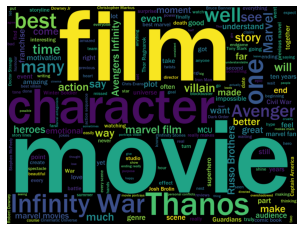

In [40]:
generate_wordcloud(sum_review)